# ✨ [Day 8](https://adventofcode.com/2019/day/8)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def fill_inputs(inputs, w, h):
    num_layers = len(inputs) // (w * h)
    images = [inputs[layer * w * h: (layer + 1) * w * h] 
              for layer in range(num_layers)]
    return images

def first_password(inputs, w=25, h=6):
    images = fill_inputs(inputs, w, h)
    num_zeros = [sum(int(d == '0') for d in x) for x in images]
    layer = num_zeros.index(min(num_zeros))
    num_1 = sum(int(d == '1') for d in images[layer])
    num_2 = sum(int(d == '2') for d in images[layer])
    return num_1 * num_2

def display_images(inputs, w=25, h=6):
    images = fill_inputs(inputs, w, h)
    # 0 is transparent, 1 is white, 2 is black
    images = [[2 - int(d) for d in x] for x in images] 
    images = np.reshape(images, (-1, w * h))
    # Find the first non-zero value for each pixel
    indices = np.cumsum(images, axis=0)
    indices = np.argmin(indices <= 0, axis=0)
    images = images[indices, np.arange(w * h)]
    # Plot
    images = np.reshape(images, (h, w))
    plt.imshow(images, cmap='gray')
    plt.axis("off")
    plt.show()

BIOS password: 2286
Decoded Image:


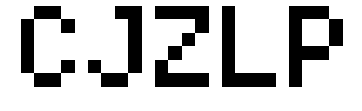

In [2]:
with open("inputs/day8.txt", 'r') as f:
    inputs = f.read()
    
print("BIOS password:", first_password(inputs, 25, 6))
print("Decoded Image:")
display_images(inputs, 25, 6)